In [38]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importing full dataset and converting complex values to real

In [41]:
x = df[['ifgram_75_corrcoef_variance', 'ifgram_25_corrcoef_mean', 'ifgram_ptp_kurtosis', 'ifgram_ptp_cov_kurtosis', 'ifgram_25_cov_kurtosis', 'ifgram_std_cov_kurtosis', 'chroma_cqt_mean_minmax', 'tonnetz_min_variance', 'tonnetz_ptp_variance', 'tempogram_ptp_variance', 'tempogram_std_variance', 'tempogram_var_variance', 'tempogram_max_cov_variance', 'tempogram_ptp_mean', 'tempogram_std_mean', 'tempogram_var_mean', 'tempogram_max_cov_mean', 'tempogram_ptp_skewness', 'tempogram_var_skewness', 'tempogram_var_kurtosis', 'tempogram_max_cov_kurtosis', 'ifgram_25_corrcoef_variance']]

y = df['classification']

for column in x.columns:
	if x[column].dtype == object:
		x[column] = x[column].apply(complex)

for column in x.columns:
	if x[column].dtype == complex:
		x[column] = x[column].apply(lambda x: x.real)

/home/daniyal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/daniyal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### Running XGBClassifier and returning feature importances

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, recall_score

model = XGBClassifier()
model.fit(x_train, y_train)
print('XG ROC ', (roc_auc_score(y_test, model.predict(x_test))))
print('XG Recall ', (recall_score(y_test, model.predict(x_test))))

XG ROC  0.6972866026
XG Recall  0.704918032787


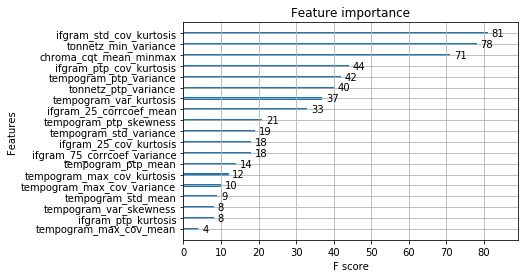

In [47]:
from xgboost import plot_importance
plot_importance(model)

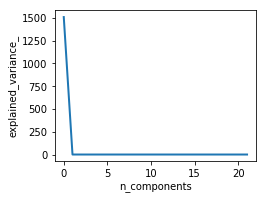

In [48]:
import numpy as np
from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(x)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [55]:
columns = pd.DataFrame(x.columns, columns=['column'])
columns = columns.join(pd.DataFrame(model.feature_importances_, columns=['feature importances']))
columns = columns.sort_values('feature importances', ascending=False)

In [52]:
columns

,column,feature importances
5,ifgram_std_cov_kurtosis,0.142857
7,tonnetz_min_variance,0.137566
6,chroma_cqt_mean_minmax,0.125220
3,ifgram_ptp_cov_kurtosis,0.077601
9,tempogram_ptp_variance,0.074074
8,tonnetz_ptp_variance,0.070547
19,tempogram_var_kurtosis,0.065256
1,ifgram_25_corrcoef_mean,0.058201
17,tempogram_ptp_skewness,0.037037
10,tempogram_std_variance,0.033510


### Data subsets to test against full dataset

In [57]:
three_features = ['ifgram_std_cov_kurtosis', 'tonnetz_min_variance', 'chroma_cqt_mean_minmax']
eight_features = ['ifgram_std_cov_kurtosis', 'tonnetz_min_variance', 'chroma_cqt_mean_minmax', 'ifgram_ptp_cov_kurtosis', 'tempogram_ptp_variance', 'tonnetz_ptp_variance', 'tempogram_var_kurtosis', 'ifgram_25_corrcoef_mean']

XG ROC  0.55
XG Recall  0.571428571429
XG ROC  0.67558007923
XG Recall  0.754385964912


### Running model with top 8 feature\_importances_ columns

In [ ]:
x_eight = x[eight_features]
x_train, x_test, y_train, y_test = train_test_split(x_eight,y)
model = XGBClassifier()
model.fit(x_train, y_train)
print('XG ROC ', (roc_auc_score(y_test, model.predict(x_test))))
print('XG Recall ', (recall_score(y_test, model.predict(x_test))))

In [58]:
from sklearn.externals import joblib
joblib.dump(model, 'xgboost_eight.pkl') 

# XG ROC  0.67558007923
# XG Recall  0.754385964912

['xgboost_eight.pkl']

### Running model with top 3 feature_importances_columns

In [92]:
x_three = x[three_features]
x_train, x_test, y_train, y_test = train_test_split(x_three,y)
model = XGBClassifier()
model.fit(x_train, y_train)
print('XG ROC ', (roc_auc_score(y_test, model.predict(x_test))))
print('XG Recall ', (recall_score(y_test, model.predict(x_test))))

XG ROC  0.681214689266
XG Recall  0.745762711864


In [93]:
from sklearn.externals import joblib
joblib.dump(model, 'xgboost_three.pkl') 
# XG ROC  0.681214689266
# XG Recall  0.745762711864

['xgboost_three.pkl']